In [1]:
print("E23CSEU2320")
print("LAB1")

E23CSEU2320
LAB1


In [1]:
!pip install diffusers


In [2]:
from diffusers import StableDiffusionPipeline
import torch
import os

# Load model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, torch_dtype=torch.float16
).to("cuda")

# Create output folder
os.makedirs("synthetic_dataset", exist_ok=True)

prompts = [
    "A futuristic city at sunset, cyberpunk style",
    "A cute robot studying in a university classroom",
    "A realistic chest X-ray image of healthy lungs",
    "An Indian street food stall at night, cinematic lighting",
    "A peaceful mountain landscape with snow and pine trees"
]

# Generate images
for i, prompt in enumerate(prompts):
    image = pipe(prompt).images[0]
    image.save(f"synthetic_dataset/image_{i+1}.png")


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

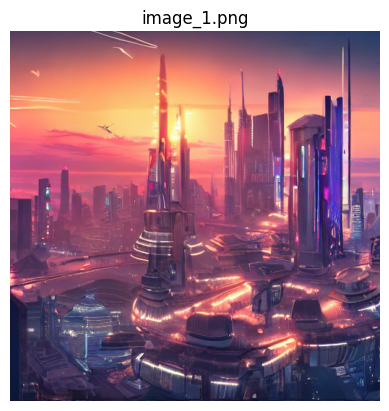

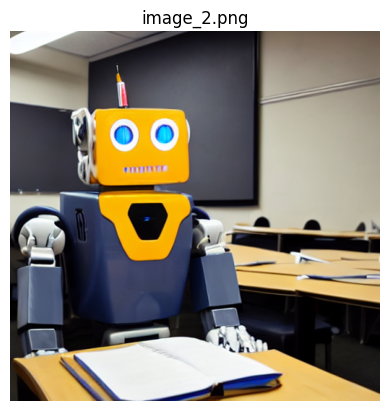

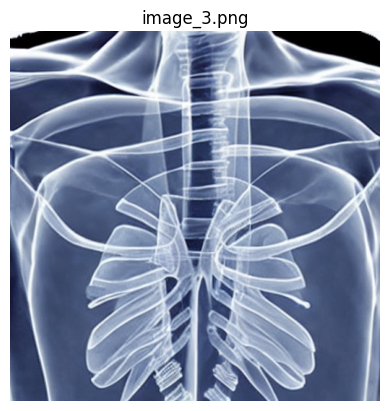

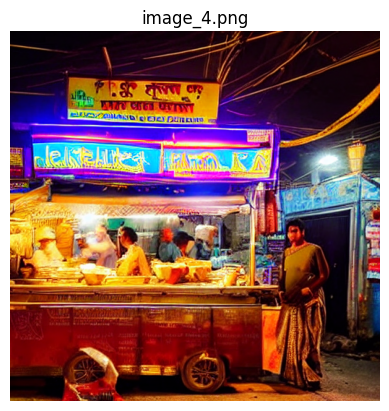

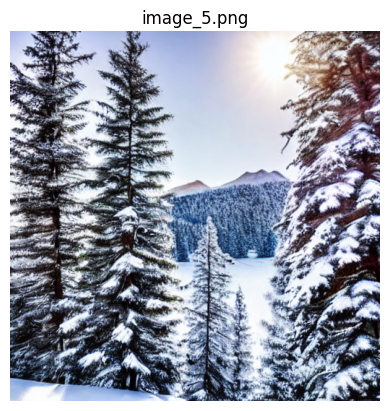

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = "synthetic_dataset"

images = sorted(os.listdir(dataset_path))

for img_name in images:
    img_path = os.path.join(dataset_path, img_name)
    img = Image.open(img_path)

    plt.imshow(img)
    plt.axis("off")
    plt.title(img_name)
    plt.show()


In [4]:
from diffusers import StableDiffusionPipeline
import torch
import os

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
).to("cuda")

pipe.enable_attention_slicing()  # reduces GPU memory usage

base_dir = "synthetic_dataset"

classes = {
    "pneumonia": "A realistic chest X-ray image showing pneumonia infection, medical radiology, high detail",
    "normal": "A realistic chest X-ray image of healthy lungs, clear lungs, medical radiology",
    "covid": "A realistic chest X-ray image showing COVID-19 lung infection, ground glass opacity, medical scan"
}

images_per_class = 20


for class_name in classes.keys():
    os.makedirs(os.path.join(base_dir, class_name), exist_ok=True)


for class_name, prompt in classes.items():
    print(f"Generating images for: {class_name}")

    class_path = os.path.join(base_dir, class_name)

    for i in range(images_per_class):
        image = pipe(
            prompt,
            guidance_scale=7.5,
            num_inference_steps=50
        ).images[0]

        image_name = f"{class_name}_{i+1}.png"
        image.save(os.path.join(class_path, image_name))

        print(f"Saved: {image_name}")

print(" Medical synthetic dataset generation completed.")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Generating images for: pneumonia


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: pneumonia_20.png
Generating images for: normal


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: normal_20.png
Generating images for: covid


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_3.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_4.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_5.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_6.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_7.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_8.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_9.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_10.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_11.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_12.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_13.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_14.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_15.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_16.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_17.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_18.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_19.png


  0%|          | 0/50 [00:00<?, ?it/s]

Saved: covid_20.png
✅ Medical synthetic dataset generation completed.
